## DAS data processing demo

Provided by [Bin Luo](mailto:luob@sustech.edu.cn) and Qipeng Bai

This notebook demo provides a simple example of reading DAS data and basic signal processing steps to handle the data, such as trimming, concatenating, detrending, common-mode noise removal, tapering, filtering, and downsamping.

The data used in this notebook was accessed from the open data repository of the RAPID experiment (https://oceanobservatories.org/pi-instrument/rapid-a-community-test-of-distributed-acoustic-sensing-on-the-ocean-observatories-initiative-regional-cabled-array/). 

## Conda environmental  

conda create -n dastools python=3.10

conda activate dastools

requirements:  
 - h5py==2.10.0
 - nptdms==1.6.0
 - numpy==1.18.5
 - scipy==1.5.0
 - segyio==1.9.9

conda install numpy scipy h5py nptdms segyio

conda install -n dastools ipykernel --update-deps --force-reinstall


In [ ]:
# !pip install -r requirements.txt

### Read metadata from the data file

In [30]:
import glob, os
import datetime
data_dir = 'M:\\waihuan_hw\\Waihuan_HW_0628\\data2'
file_list = glob.glob(f'{data_dir}\\*')
get_datetime = lambda x: os.path.basename(x)
file_datetime = list(map(get_datetime, file_list))
file_datetime

['wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_022855.084.h5',
 'wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_022925.084.h5',
 'wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_022955.084.h5',
 'wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_023025.084.h5',
 'wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_023055.084.h5',
 'wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_023125.084.h5',
 'wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_023155.084.h5',
 'wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_023225.084.h5',
 'wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_023255.084.h5',
 'wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_023325.084.h5',
 'wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_023355.084.h5',
 'wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_023425.084.h5',
 'wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_023455.084.h5',
 'wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_023525.084.h5',
 'wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_023555.084.h5',
 'wh_hw_17km_GL_10m_frq_5

In [2]:
fname = 'M:\\waihuan_hw\\Waihuan_HW_0628\\data2\\wh_hw_17km_GL_10m_frq_500Hz_sp_4m_UTC_20240628_022855.084.h5'
metadata = dp.read_das(fname, metadata=True)

for key in metadata.keys():
    print(key, ':', metadata[key])

dt : 0.002
nt : 15000
dx : 4.083807945251465
nch : 4224
GL : 10.0
headers : {'AcquisitionDescription': b'', 'AcquisitionId': b'f7fc278c-1efe-26ef-4106-576003cee47c', 'FacilityId': array([b'TBD'], dtype='|S3'), 'GaugeLength': 10.0, 'GaugeLength.uom': b'm', 'MaximumFrequency': 250.0, 'MaximumFrequency.uom': b'Hz', 'MeasurementStartTime': b'2024-06-28T02:28:55.084678+00:00', 'MinimumFrequency': 0.0, 'MinimumFrequency.uom': b'Hz', 'NumberOfLoci': 4224, 'PulseRate': 5000.0, 'PulseRate.uom': b'Hz', 'PulseWidth': 50.0, 'PulseWidth.uom': b'ns', 'ServiceCompanyName': b'Silixa', 'SpatialSamplingInterval': 4.083807945251465, 'SpatialSamplingInterval.uom': b'm', 'StartLocusIndex': 0, 'TriggeredMeasurement': False, 'schemaVersion': b'2.1', 'uuid': b'edf383a9-1f83-41ff-b82f-e458f09bc5ab'}


### Read DAS raw data from the data file

In [3]:
%%time
data = dp.read_das(fname)
print(data.shape)  # data shape convention: (number of channels, number of time samples)

(4224, 15000)
CPU times: total: 172 ms
Wall time: 591 ms


In [5]:
%%time
data = dp.read_das(fname)
print(data.shape)

(4224, 15000)
CPU times: total: 93.8 ms
Wall time: 77 ms


### Preview the raw data

<IPython.core.display.Javascript object>


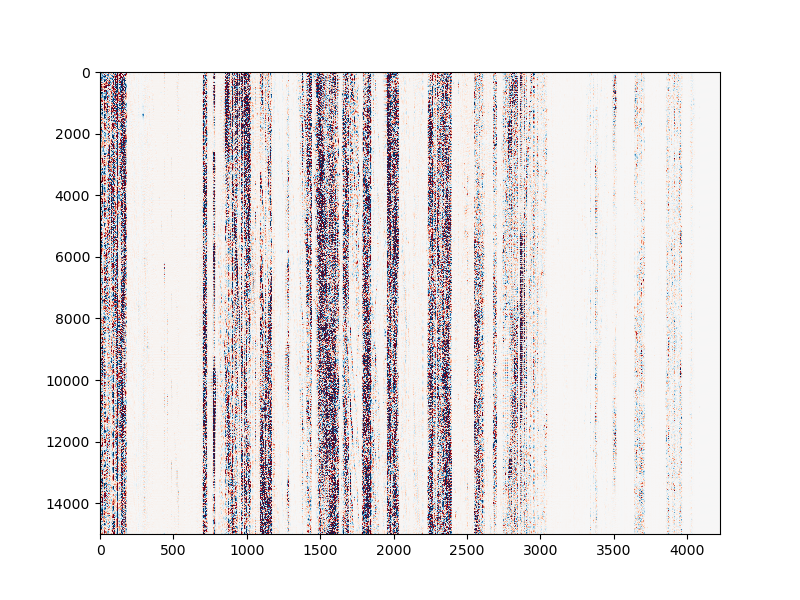

In [18]:
%matplotlib notebook
plt.figure(figsize=[8,6])

data_plot = data[:, :]
clim = data_plot.std() / 3
plt.imshow(data_plot.T, aspect='auto', cmap='RdBu', vmin=-clim, vmax=clim)

In [ ]:
np.delete

### Detrend data, remove common-mode noise, and plot data

In [7]:
# preprocessing / common-mode noise removal
data1 = dp.das_preprocess(data)

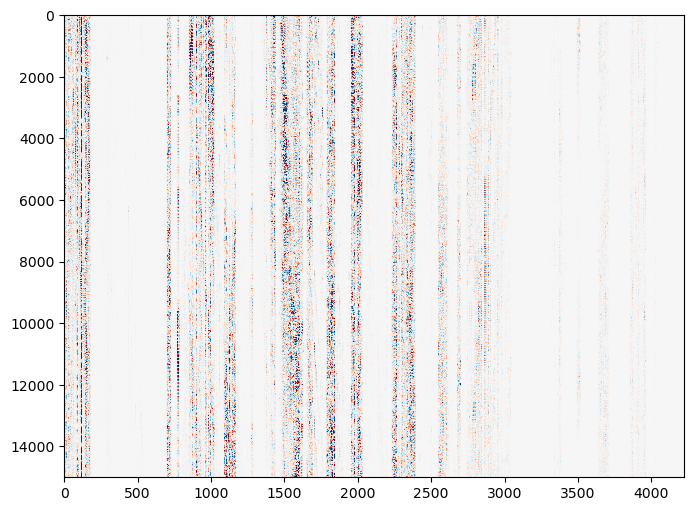

In [8]:
plt.figure(figsize=[8,6])

data_plot = data1[:, :]
clim = data_plot.std() 
plt.imshow(data_plot.T, aspect='auto', cmap='RdBu', vmin=-clim, vmax=clim)

### Filter and plot data

In [22]:
# data filtering (channel-by-channel)
dt = metadata['dt']
dx = metadata['dx']
data2 = dp.tapering(data1, 0.2)
data2 = dp.lowpass(data2, dt, fh=4)
data2 = dp.das_preprocess(data2)

<IPython.core.display.Javascript object>


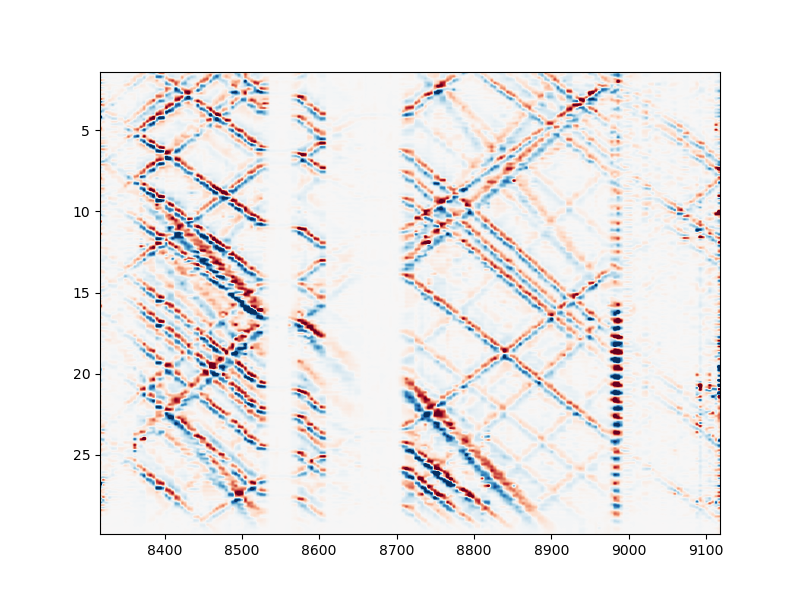

In [23]:
plt.figure(figsize=[8,6])

data_plot = data2[:, :]
clim = data_plot.std() 
plt.imshow(data_plot.T, aspect='auto', cmap='RdBu', vmin=-clim, vmax=clim,
          extent=[0, data_plot.shape[0]*dx, data_plot.shape[1]*dt, 0])

In [25]:
8319/dx, 9115/dx

(2037.0693508427828, 2231.9854709618903)

In [44]:
%%time
datalist = []

for fname in file_list[:20]:
    datalist.append(dp.read_das(fname, ch1=2037, ch2=2231))

data = np.concatenate(datalist, axis=1)

CPU times: total: 1.2 s
Wall time: 6.3 s


In [45]:
len(file_list)

664

In [63]:
# data filtering (channel-by-channel)
from scipy.signal import decimate

dt = metadata['dt']
dx = metadata['dx']
data1 = dp.das_preprocess(data)

data1 = np.delete(data1, np.r_[np.arange(52,61), np.arange(82,94)], axis=0)

data2 = dp.tapering(data1, 0.2)
data2 = dp.lowpass(data2, dt, fh=1)
data2 = dp.das_preprocess(data2)

data2 = decimate(data2, 10).astype('float')
data2 = decimate(data2, 10).astype('float')

data2 = data2 / (data2).std(axis=1, keepdims=True)
data2.shape

(173, 3000)

<IPython.core.display.Javascript object>


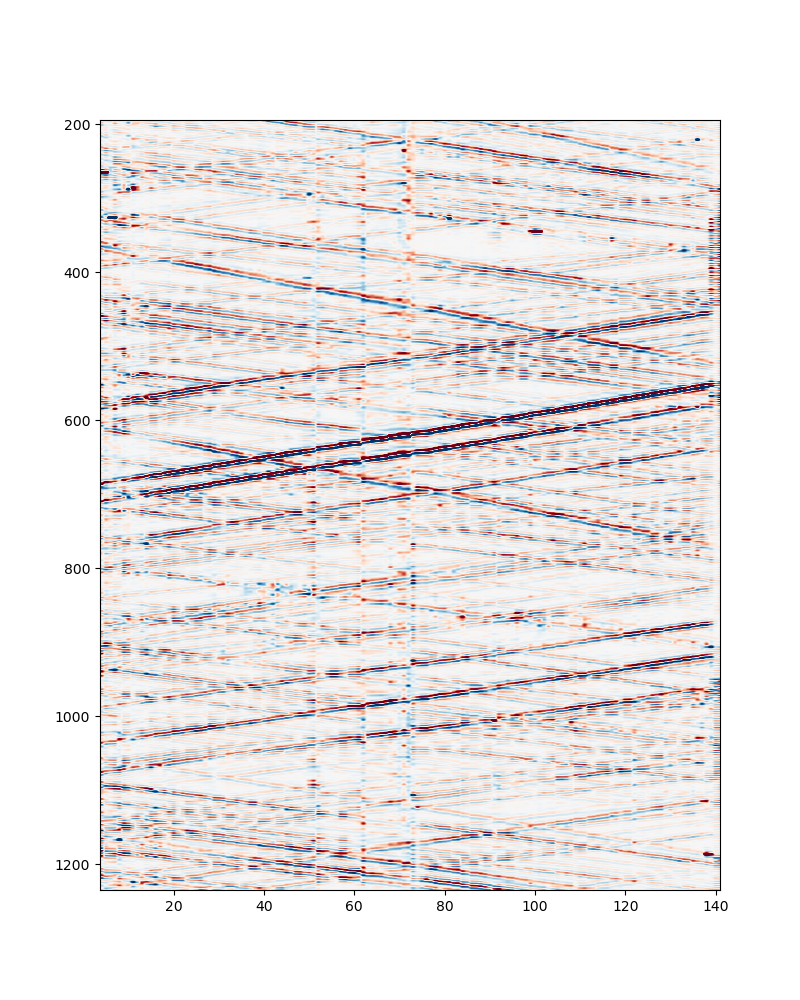

In [64]:
plt.figure(figsize=[8,10])

data_plot = data2[:, :]
clim = data_plot.std() * 3
plt.imshow(data_plot.T, aspect='auto', cmap='RdBu', vmin=-clim, vmax=clim,)
#           extent=[0, data_plot.shape[0]*dx, data_plot.shape[1]*dt, 0])

<IPython.core.display.Javascript object>


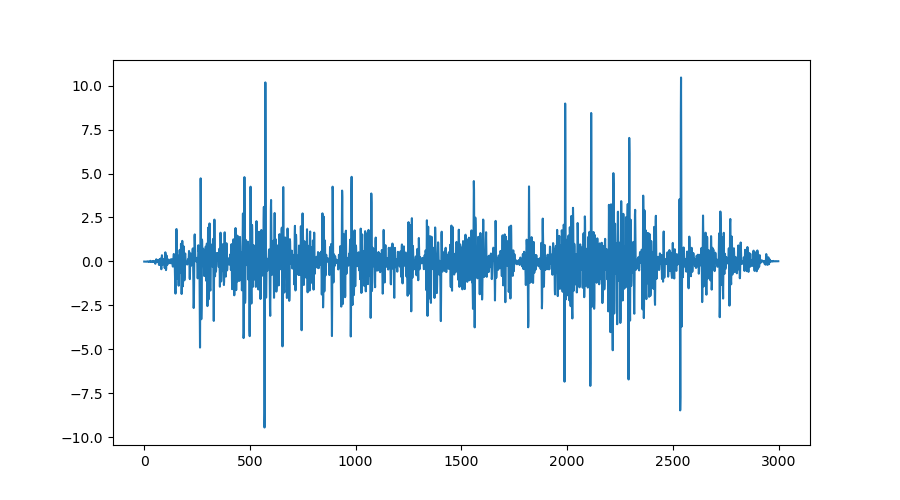

In [66]:
plt.figure(figsize=[9,5])

plt.plot(data2[120,:])

### Calculate frequency spectrum

### FK transform

In [121]:
fk = np.fft.fftshift(np.fft.fft2(data2))
faxis = np.fft.fftshift(np.fft.fftfreq(data2.shape[1], metadata['dt']*100))
kaxis = np.fft.fftshift(np.fft.fftfreq(data2.shape[0], metadata['dx']))

<IPython.core.display.Javascript object>


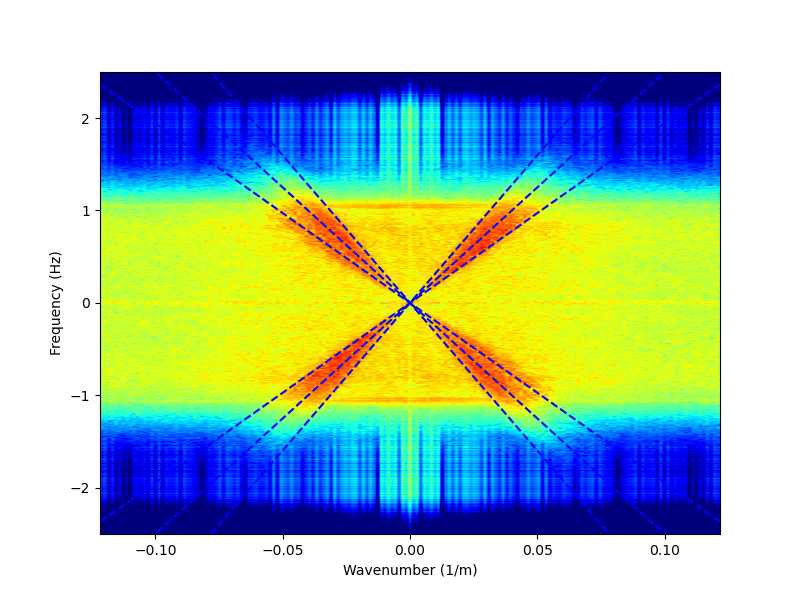

(-2.5, 2.4983333333333335)

In [243]:
plt.figure(figsize=[8,6])

data_plot = np.log10(abs(fk[:, :]))
clim = data_plot.std() * 3.5
extent = [kaxis[0], kaxis[-1], faxis[0], faxis[-1]]
plt.imshow(data_plot.T, aspect='auto', cmap='jet', vmin=0, vmax=clim, 
           origin='lower', extent=extent)

plt.plot(kaxis, kaxis* 115/3.6, '--b')
plt.plot(kaxis, kaxis* 90/3.6, '--b')
plt.plot(kaxis, kaxis* 70/3.6, '--b')

plt.plot(kaxis, -kaxis* 115/3.6, '--b')
plt.plot(kaxis, -kaxis* 90/3.6, '--b')
plt.plot(kaxis, -kaxis* 70/3.6, '--b')

plt.xlabel('Wavenumber (1/m)')
plt.ylabel('Frequency (Hz)')

plt.xlim((kaxis[0], kaxis[-1]))
plt.ylim((faxis[0], faxis[-1]))

In [138]:
Vmat = faxis[None,:] / (kaxis[:,None]+1.e-10)
fk_pos = np.copy(fk)
# fk_pos[Vmat <= 0] = 0

fk_pos[(Vmat <= -10/3.6) & (Vmat >= -200/3.6)] = 0
data_V_pos = np.fft.ifft2(np.fft.ifftshift(fk_pos)).real

In [141]:
Vmat = faxis[None,:] / (kaxis[:,None]+1.e-10)
fk_neg = np.copy(fk)
# fk_neg[Vmat >= 0] = 0

fk_neg[(Vmat >= 10/3.6) & (Vmat <= 200/3.6)] = 0
data_V_neg = np.fft.ifft2(np.fft.ifftshift(fk_neg)).real

<IPython.core.display.Javascript object>


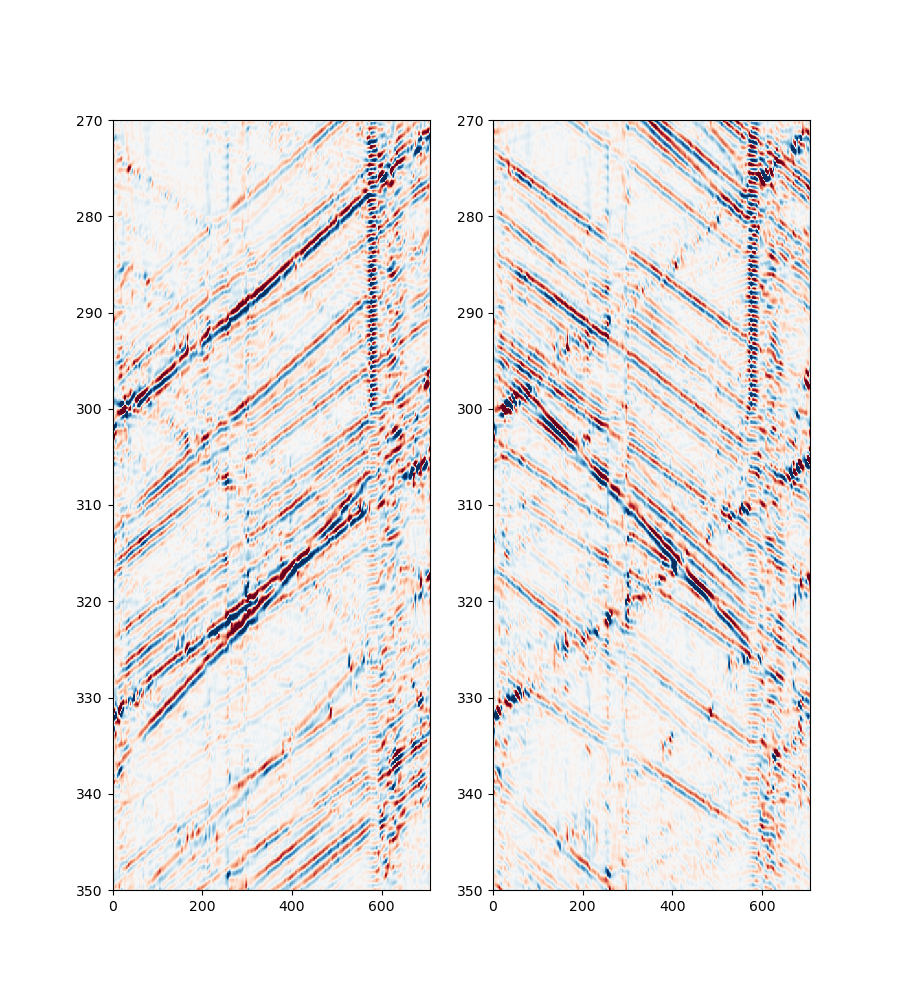

(350.0, 270.0)

In [142]:
fig, ax = plt.subplots(1,2, figsize=[9,10])

data_plot = data_V_pos[:, :]
data_plot2 = data_V_neg[:, :]
# data_plot = data2 - data_V_pos[:, :]

xmin, xmax = 0, data_plot.shape[0]*dx
ymax, ymin = 350, 270 #data_plot.shape[1]*dt*100, 0

clim = data_plot.std() * 3
ax[0].imshow(data_plot.T, aspect='auto', cmap='RdBu', vmin=-clim, vmax=clim,
             extent=[0, data_plot.shape[0]*dx, data_plot.shape[1]*dt*100, 0])

clim = data_plot2.std() * 3
ax[1].imshow(data_plot2.T, aspect='auto', cmap='RdBu', vmin=-clim, vmax=clim,
             extent=[0, data_plot.shape[0]*dx, data_plot.shape[1]*dt*100, 0])

ax[0].set_xlim([xmin, xmax])
ax[1].set_xlim([xmin, xmax])

ax[0].set_ylim([ymax, ymin])
ax[1].set_ylim([ymax, ymin])

<IPython.core.display.Javascript object>


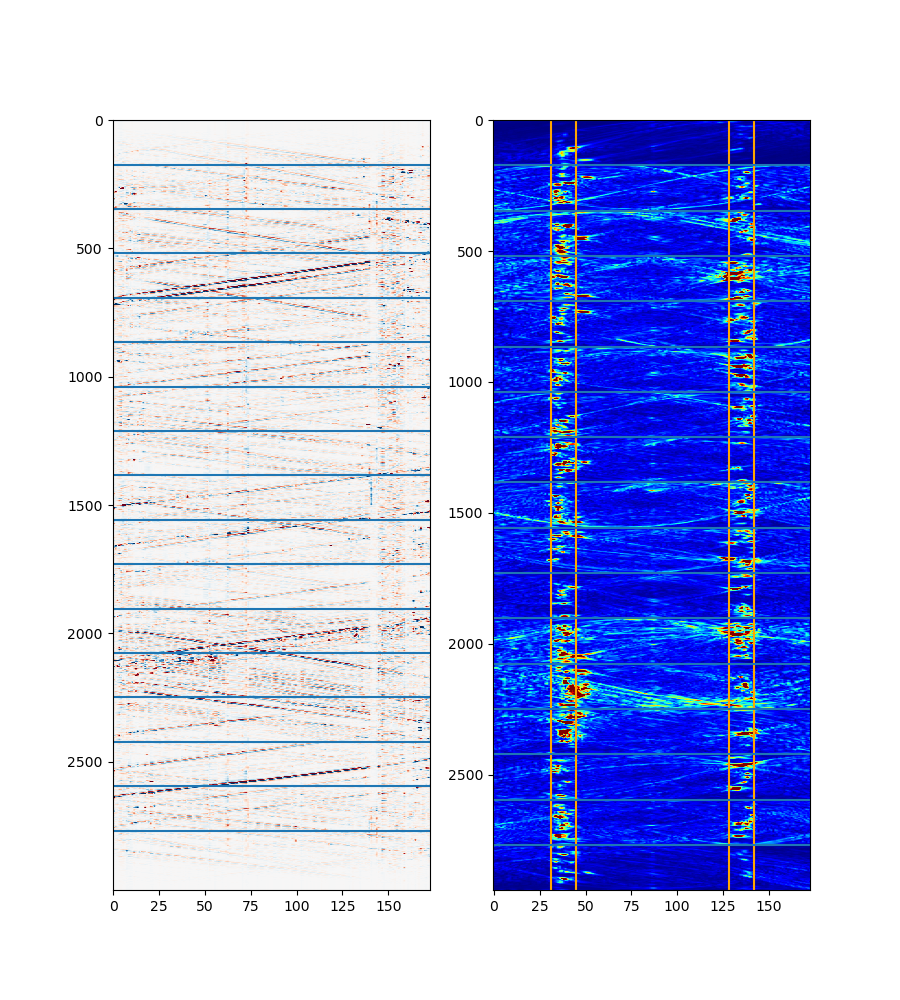

In [241]:
from skimage.transform import radon
from scipy.signal import hilbert

fig, ax = plt.subplots(1,2, figsize=[9,10])

data_plot =  data2 #data_V_neg[:, :]

win = 173
theta = np.linspace(0, 180, win, endpoint=False)

data_plot2 = []
for i in range(data_plot.shape[1]//win):
    data_plot2.append(abs(hilbert(radon(data_plot[:, i*win:(i+1)*win], theta=theta), axis=0)))
    
data_plot2 = np.concatenate(data_plot2)

xmin, xmax = 0, data_plot.shape[0]*dx
ymax, ymin = 350, 270 #data_plot.shape[1]*dt*100, 0

clim = data_plot.std() * 3
ax[0].imshow(data_plot.T, aspect='auto', cmap='RdBu', vmin=-clim, vmax=clim,)
#              extent=[0, data_plot.shape[0]*dx, data_plot.shape[1]*dt*100, 0])

clim = data_plot2.std() * 5
ax[1].imshow(abs(data_plot2), aspect='auto', cmap='jet', vmin=0, vmax=clim,)
#              extent=[0, data_plot.shape[0]*dx, data_plot.shape[1]*dt*100, 0])

# ax[0].set_xlim([xmin, xmax])
# ax[1].set_xlim([xmin, xmax])

# ax[0].set_ylim([ymax, ymin])
# ax[1].set_ylim([ymax, ymin])

kmph_to_theta = lambda kmph: np.degrees(np.arctan( 1./( kmph/3.6 / dx * (dt*100)) ))


ax[1].axvline((180-kmph_to_theta(115))/180*173, color='orange')
# ax[1].axvline((180-kmph_to_theta(95))/180*173)
ax[1].axvline((180-kmph_to_theta(70))/180*173, color='orange')

ax[1].axvline(kmph_to_theta(115)/180*173, color='orange')
# ax[1].axvline(kmph_to_theta(95)/180*173)
ax[1].axvline(kmph_to_theta(70)/180*173, color='orange')

for i in range(3000//173):
    ax[0].axhline(i*173)
    ax[1].axhline(i*173)    

<IPython.core.display.Javascript object>


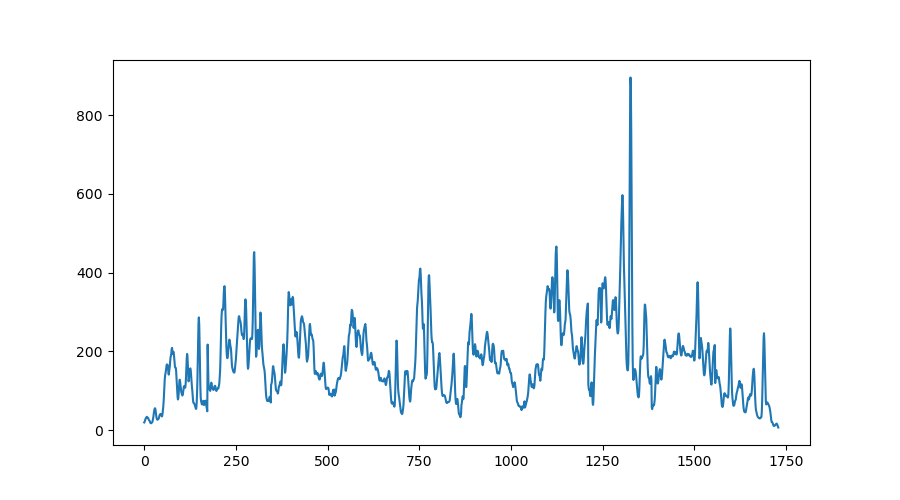

In [204]:
plt.figure(figsize=[9,5])

# plt.plot(theta, abs(data_plot2).mean(axis=0))
# plt.plot(abs(data_plot2).mean(axis=1))

plt.plot(data_plot2[:,66])